In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
%matplotlib inline

from spineq.data_fetcher import get_uo_sensors, get_oa_shapes, get_oa_centroids
from spineq.plotting import plot_optimisation_result, plot_sensors
from spineq.optimise import calc_coverage, calc_oa_weights
from spineq.urb_obs import get_uo_sensor_dict, plot_uo_coverage_grid

In [2]:
uo_sensors = get_uo_sensors()
uo_sensors

,h_ground,longitude,broker,latitude,h_sea,3rdparty,name,oa11cd,geometry
id,,,,,,,,,
73086,2.0,-1.617310,aq_mesh_api,54.972260,45.369999,0,PER_AIRMON_MESH1757150,E00042826,POINT (424596.567 564248.757)
73087,2.0,-1.612715,aq_mesh_api,54.975755,47.189999,0,PER_AIRMON_MESH1758150,E00042579,POINT (424888.580 564639.302)
1726,2.0,-1.619756,aq_mesh_api,55.006886,62.590000,0,PER_AIRMON_MONITOR914,E00042735,POINT (424419.171 568101.108)
79515,2.0,-1.710531,aq_mesh_api,54.991754,111.879997,0,PER_AIRMON_MESH303245,E00042257,POINT (418620.224 566389.407)
79158,2.0,-1.718833,aq_mesh_api,54.995352,107.669998,0,PER_AIRMON_MESH1915150,E00042862,POINT (418087.420 566787.639)
...,...,...,...,...,...,...,...,...,...
73228,2.0,-1.618759,Emote Air Quality Sensor,54.975987,57.869999,0,PER_EMOTE_2604,E00042580,POINT (424501.571 564662.997)
73230,2.0,-1.619008,Emote Air Quality Sensor,54.976282,59.459999,0,PER_EMOTE_2606,E00042580,POINT (424485.456 564695.738)
73225,2.0,-1.616611,Emote Air Quality Sensor,54.981944,56.810001,0,PER_EMOTE_2601,E00042580,POINT (424635.463 565326.643)


## Sensor Locations

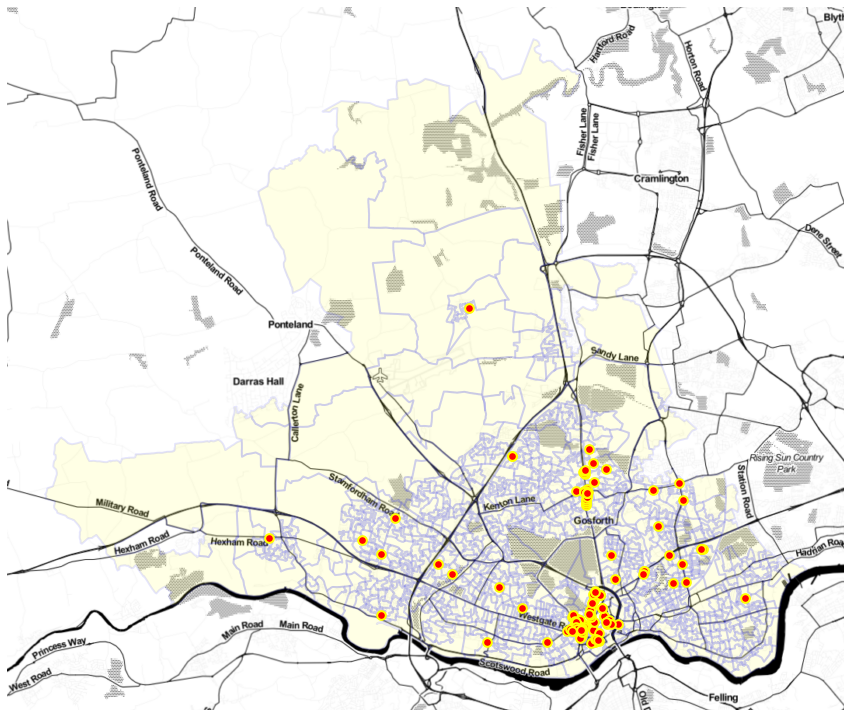

In [3]:
plot_sensors(uo_sensors, centroids=False)

## Coverage Grid

<AxesSubplot:title={'center':'Urban Observatory: 146 sensors in 55 output areas'}>

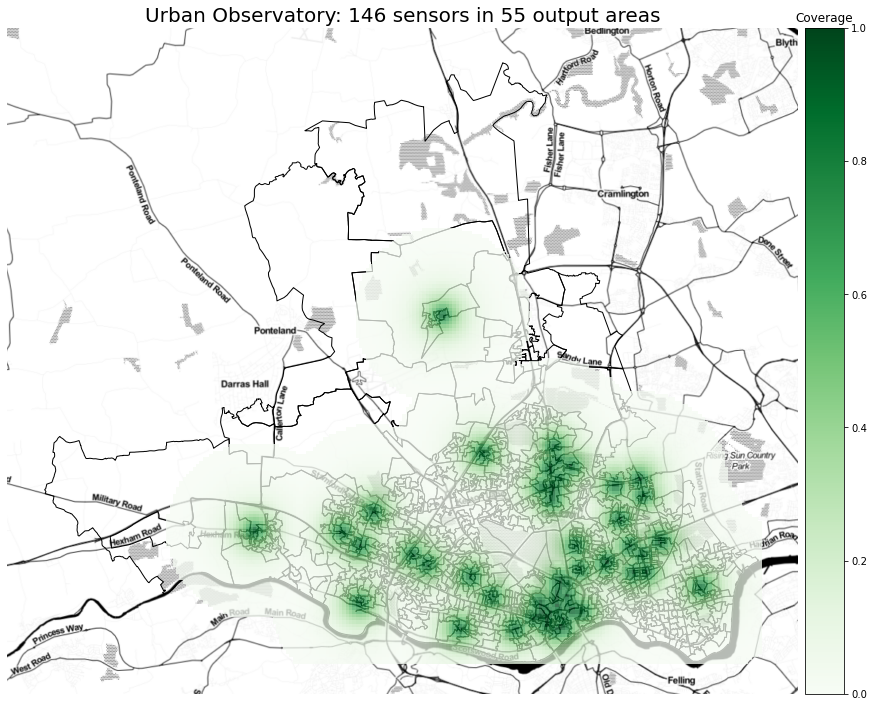

In [4]:
plot_uo_coverage_grid(theta=500)

## Output Area Coverage (snap UO sensors to OA centroids)

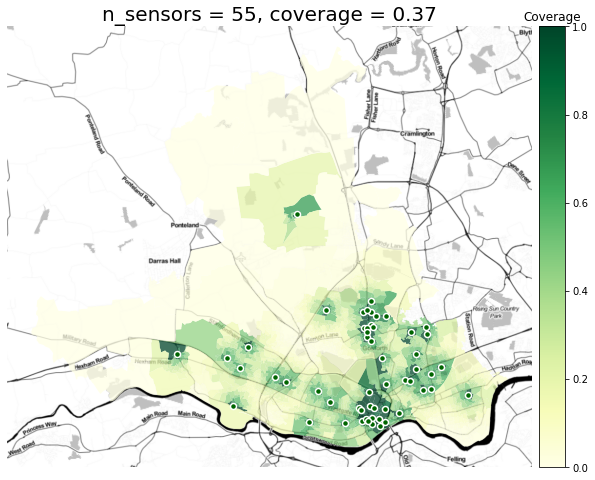

In [5]:
sensor_dict = get_uo_sensor_dict()

oa_weight = calc_oa_weights(
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={
        "pop_total": {"min": 0, "max": 90, "weight": 1},
        "pop_children": {"min": 0, "max": 16, "weight": 0},
        "pop_elderly": {"min": 70, "max": 90, "weight": 0},
    },
)
coverage = calc_coverage(sensor_dict, oa_weight=oa_weight, theta=500)

coverage["sensors"] = sensor_dict
plot_optimisation_result(coverage)